In [16]:

import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [17]:
Emotions = pd.read_csv('/data/nadeem/0709_Ravdess_experiments/Ravdess_preprocessed/ravdess_mfmc_no_augmentation.csv')

In [18]:
Emotions=Emotions.fillna(0)

In [19]:
Emotions

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,Emotions
0,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.773800,...,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,surprise
1,-94.77380,-94.77380,-94.77380,-94.77380,-93.02991,-92.47590,-86.71586,-86.79671,-84.27315,-79.636130,...,-74.762642,-84.632401,-79.380943,-78.015015,-74.673454,-76.954376,-76.362503,-87.487991,-81.792877,surprise
2,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.773800,...,-94.534218,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,surprise
3,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-93.89540,-93.623924,...,-77.477768,-94.773804,-88.197449,-90.022034,-84.835556,-82.539917,-85.606018,-94.498711,-91.815567,surprise
4,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.77380,-94.773800,...,-91.837326,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,-94.773804,surprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368635,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.536250,...,-68.416748,-67.612175,-73.752625,-71.219299,-76.806038,-77.536247,-77.536247,-77.536247,-77.536247,angry
368636,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.536250,...,-76.896988,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,angry
368637,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.536250,...,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,angry
368638,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.53625,-77.536250,...,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,-77.536247,angry


# Data preparation

In [20]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [21]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((294912, 251), (294912, 7), (73728, 251), (73728, 7))

In [ ]:
#reshape for cnn
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [24]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((294912, 251), (294912, 7), (73728, 251), (73728, 7))

In [25]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('0603)best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [27]:

early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# CNN model

In [ ]:
#Reshape for CNN MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((294912, 251, 1), (294912, 7), (73728, 251, 1), (73728, 7))

In [29]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Channel Attention Layer for 1D
class ChannelAttention(L.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.channels = channels
        self.reduction_ratio = reduction_ratio
        self.shared_mlp = tf.keras.Sequential([
            L.Dense(channels // reduction_ratio, activation='relu', kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros'),
            L.Dense(channels, kernel_initializer='he_normal', use_bias=True, bias_initializer='zeros')
        ])

    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=1, keepdims=True)
        avg_out = self.shared_mlp(avg_pool)
        max_out = self.shared_mlp(max_pool)
        attention = tf.nn.sigmoid(avg_out + max_out)
        return inputs * attention

# Spatial Attention Layer for 1D
class SpatialAttention(L.Layer):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = L.Conv1D(1, kernel_size=7, padding='same', activation='sigmoid', kernel_initializer='he_normal', use_bias=False)

    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)
        concat = tf.concat([avg_pool, max_pool], axis=-1)
        attention = self.conv(concat)
        return inputs * attention

# Define the model
input_shape = (X_train.shape[1], X_train.shape[2])
inputs = tf.keras.Input(shape=input_shape)

# Convolutional layers
x = L.Conv1D(256, kernel_size=7, strides=1, activation='relu', kernel_regularizer=l2(0.001))(inputs)
x = L.BatchNormalization()(x)
x = L.MaxPool1D(pool_size=1, strides=1)(x)

x = L.Conv1D(256, kernel_size=7, strides=1, activation='relu', kernel_regularizer=l2(0.001))(x)
x = L.BatchNormalization()(x)
x = L.MaxPool1D(pool_size=1, strides=1)(x)
x = L.Dropout(0.20)(x)

# Channel Attention
channel_attention = ChannelAttention(channels=x.shape[-1])
x = channel_attention(x)

# Spatial Attention
spatial_attention = SpatialAttention()
x = spatial_attention(x)

# Fully connected layers
x = L.Flatten()(x)
x = L.Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = L.BatchNormalization()(x)
outputs = L.Dense(7, activation='softmax')(x)

# Create model
model = Model(inputs, outputs)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate scheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 251, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 245, 256)       │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 245, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 245, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 239, 256)       │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 239, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 239, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 239, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_attention_1             │ (None, 239, 256)       │         8,464 │
│ (ChannelAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61184)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     3,915,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,388,119 (16.74 MB)

 Trainable params: 4,386,967 (16.73 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [30]:
history=model.fit(x_traincnn, y_train, validation_data=(x_testcnn, y_test), epochs=100, 
          batch_size=32)

Epoch 1/100


2024-08-01 16:40:10.031969: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  26/9216 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.2171 - loss: 2.7235   

I0000 00:00:1722498015.882160 2611316 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9216/9216 ━━━━━━━━━━━━━━━━━━━━ 215s 22ms/step - accuracy: 0.5293 - loss: 1.6505 - val_accuracy: 0.8349 - val_loss: 0.9267
Epoch 2/100
9216/9216 ━━━━━━━━━━━━━━━━━━━━ 198s 21ms/step - accuracy: 0.8206 - loss: 0.9363 - val_accuracy: 0.9111 - val_loss: 0.7058
Epoch 3/100
9216/9216 ━━━━━━━━━━━━━━━━━━━━ 186s 20ms/step - accuracy: 0.8987 - loss: 0.7195 - val_accuracy: 0.9428 - val_loss: 0.5770
Epoch 4/100
9216/9216 ━━━━━━━━━━━━━━━━━━━━ 189s 20ms/step - accuracy: 0.9341 - loss: 0.5954 - val_accuracy: 0.9583 - val_loss: 0.4978
Epoch 5/100
9216/9216 ━━━━━━━━━━━━━━━━━━━━ 191s 21ms/step - accuracy: 0.9535 - loss: 0.5138 - val_accuracy: 0.9702 - val_loss: 0.4428
Epoch 6/100
9216/9216 ━━━━━━━━━━━━━━━━━━━━ 197s 21ms/step - accuracy: 0.9666 - loss: 0.4537 - val_accuracy: 0.9759 - val_loss: 0.4026
Epoch 7/100
9216/9216 ━━━━━━━━━━━━━━━━━━━━ 212s 23ms/step - accuracy: 0.9736 - loss: 0.4108 - val_accuracy: 0.9805 - val_loss: 0.3722
Epoch 8/100
9216/9216 ━━━━━━━━━━━━━━━━━━━━ 220s 24ms/step - accuracy: 0.97

In [31]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

2304/2304 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9923 - loss: 0.0762
Accuracy of our model on test data :  99.23502802848816 %


In [32]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

2304/2304 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,angry,angry
2,disgust,disgust
3,happy,happy
4,disgust,disgust
5,angry,angry
6,neutral,neutral
7,neutral,neutral
8,sad,sad
9,angry,angry


Some plots of multi_model
______________________________________________


# Evalutation

Results of best model

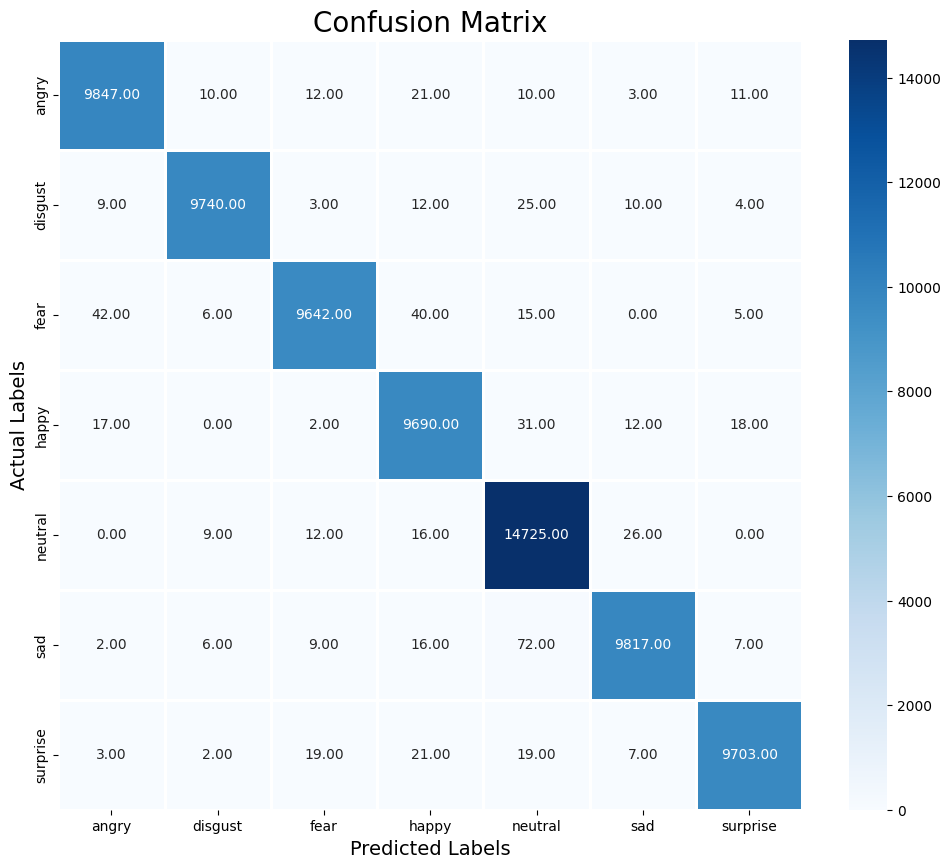

              precision    recall  f1-score   support

       angry       0.99      0.99      0.99      9914
     disgust       1.00      0.99      1.00      9803
        fear       0.99      0.99      0.99      9750
       happy       0.99      0.99      0.99      9770
     neutral       0.99      1.00      0.99     14788
         sad       0.99      0.99      0.99      9929
    surprise       1.00      0.99      0.99      9774

    accuracy                           0.99     73728
   macro avg       0.99      0.99      0.99     73728
weighted avg       0.99      0.99      0.99     73728



In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

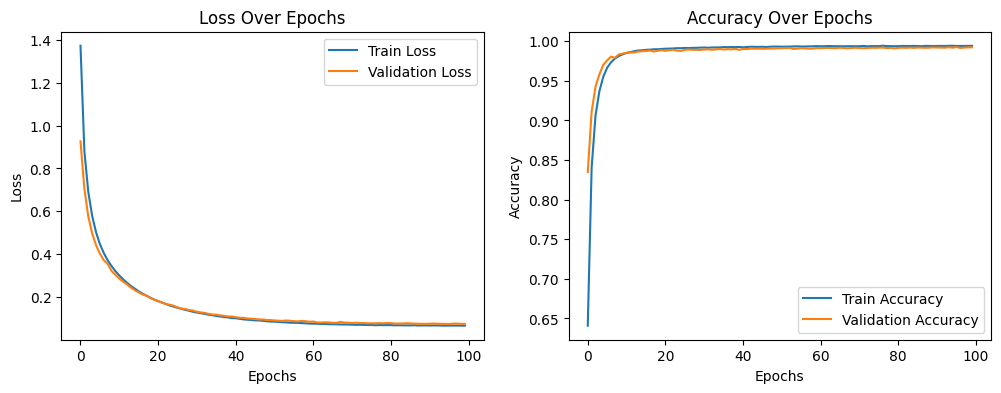

In [34]:
import matplotlib.pyplot as plt

# 가정: 'history'는 model.fit()의 결과로 얻은 History 객체입니다.
# 예: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

def plot_history(history):
    # 손실 그래프
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.show()

# history 객체를 사용하여 그래프 출력
plot_history(history)

In [ ]:
model.save("ravdess_mfcc_aug_csa.h5")

ValueError: Unable to synchronously create dataset (name already exists)

: 

In [ ]:
model.save("ravdess_preprocessed/Results/ravdess_mfcc_noaugmentation_ca.h5")

ValueError: Unable to synchronously create dataset (name already exists)